INF8770 Technologies multimédias

Polytechnique Montréal

Exemple d'utilisation de SIFT (Note: un équivalent de SIFT est utilisé). SIFT breveté.

In [1]:
import cv2  
import matplotlib.pyplot as plt
import imutils

Lecture de deux images tests et affichage.

[[145 144 144 ... 148 149 149]
 [145 149 153 ... 148 149 150]
 [145 154 162 ... 149 149 150]
 ...
 [106 105 103 ... 136 130 112]
 [107 108 104 ... 104 142 142]
 [ 99 104 106 ... 107 144 151]]


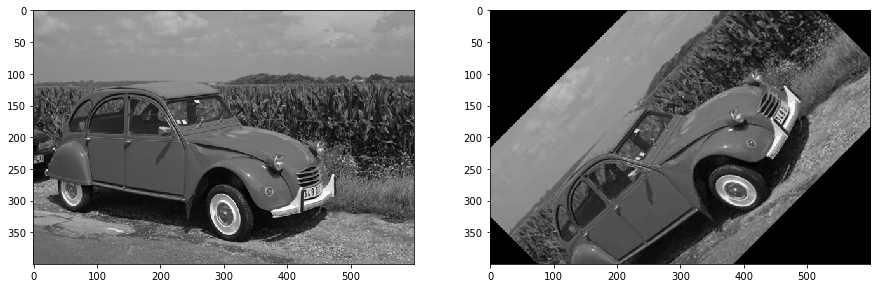

In [2]:
image1 = cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('RGBBlocs.jpg',cv2.IMREAD_GRAYSCALE) 
image2 = imutils.rotate(image2, 45) #Image bruitée + tournée de 45 deg. 
print(image1)
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points clefs sur les images. On utilise ORB.

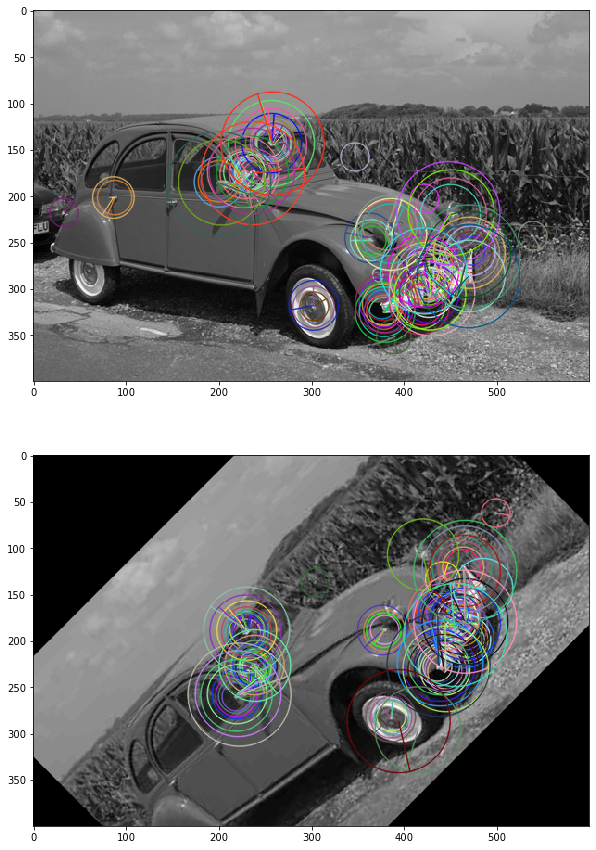

In [3]:
orb = cv2.ORB_create(nfeatures=100, scoreType=cv2.ORB_FAST_SCORE) #On peut avoir plus de 100 points
pointsclefs1 = orb.detect(image1,None)
pointsclefs2 = orb.detect(image2,None)

#Le cercle représente l'échelle, et la ligne l'angle.
imageout1 = cv2.drawKeypoints(image1,pointsclefs1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(image2,pointsclefs2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(2, 1, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Description des points clefs. On utilise FREAK.

In [4]:
freakExtractor = cv2.xfeatures2d.FREAK_create()
pointsclefs1,descripteurs1= freakExtractor.compute(image1,pointsclefs1)
pointsclefs2,descripteurs2= freakExtractor.compute(image2,pointsclefs2)

Mise en correspondance des points.

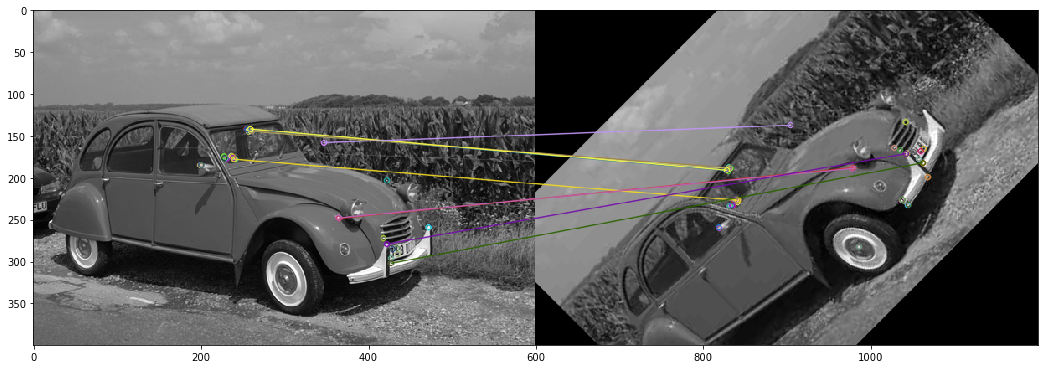

In [5]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(descripteurs1,descripteurs2)
correspondances = sorted(correspondances, key = lambda x:x.distance) #On affichera seulement quelques correspondances
plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(image1,pointsclefs1,image2,pointsclefs2,correspondances[0:10],2, None)
plt.imshow(imageout3)
plt.show()

On note qu'on peut faire des correspondances, malgré le bruit et la rotation. 